Upload an image:


Saving TASK 12.jpeg to TASK 12.jpeg


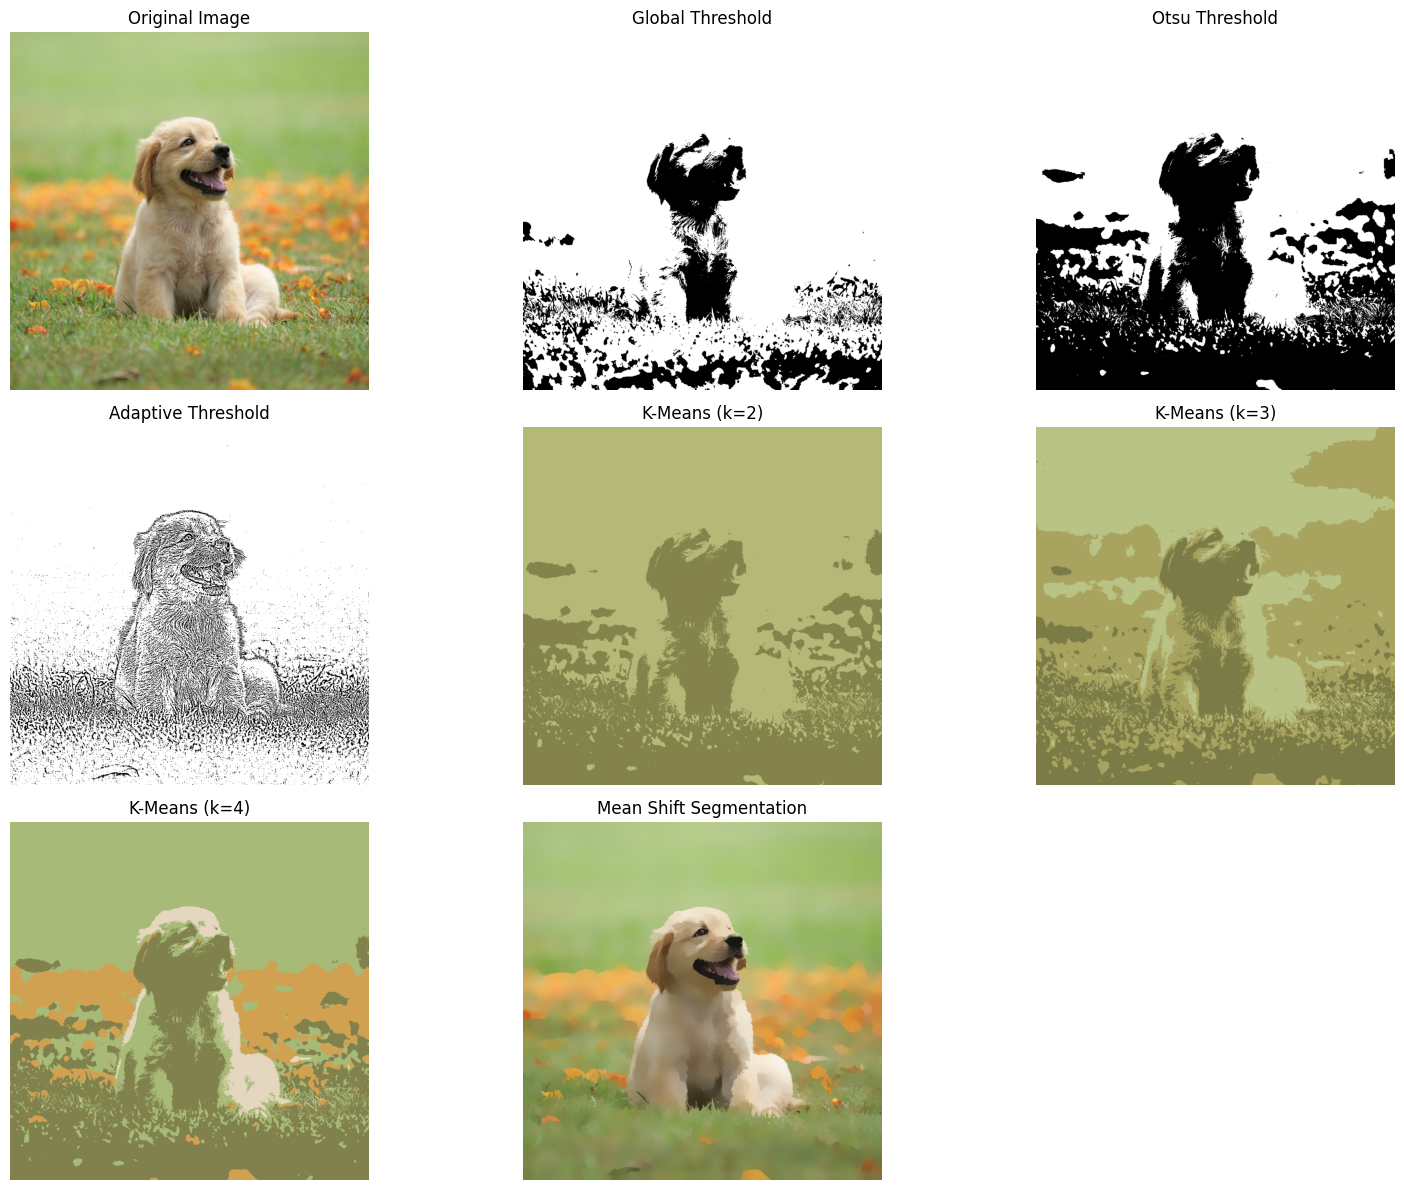


Observations:
1. Global Thresholding works best when the image has uniform lighting.
2. Otsu Thresholding automatically finds the optimal threshold for bimodal histograms.
3. Adaptive Thresholding handles varying lighting conditions and non-uniform backgrounds.
4. K-Means segmentation groups colors and works well for color images; higher k gives more clusters.
5. Mean Shift segmentation preserves edges and smooth regions but can be slower for large images.



In [1]:
# ============================================
# LAB 12 – SEGMENTATION TECHNIQUES (Improved)
# Global, Local, Adaptive Thresholding + K-Means + Mean Shift
# ============================================

from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. IMAGE UPLOAD
# -----------------------------
print("Upload an image:")
uploaded = files.upload()
image_name = list(uploaded.keys())[0]

img_color = cv2.imread(image_name)
if img_color is None:
    raise FileNotFoundError(f"Could not read the uploaded image: {image_name}")

img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

# -----------------------------
# 2. THRESHOLDING FUNCTIONS
# -----------------------------
def global_threshold(image, thresh_val=127):
    _, result = cv2.threshold(image, thresh_val, 255, cv2.THRESH_BINARY)
    return result

def otsu_threshold(image):
    _, result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return result

def adaptive_threshold(image, method=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, block_size=11, C=2):
    result = cv2.adaptiveThreshold(
        image, 255, method, cv2.THRESH_BINARY, block_size, C
    )
    return result

# Apply thresholding
global_thresh = global_threshold(img_gray)
otsu_thresh = otsu_threshold(img_gray)
adaptive_thresh = adaptive_threshold(img_gray)

# -----------------------------
# 3. K-MEANS SEGMENTATION
# -----------------------------
def kmeans_segmentation(image, k):
    """Segment image using K-means clustering."""
    Z = image.reshape((-1,3))
    Z = np.float32(Z)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    segmented = centers[labels.flatten()]
    return segmented.reshape(image.shape)

k2 = kmeans_segmentation(img_color, 2)
k3 = kmeans_segmentation(img_color, 3)
k4 = kmeans_segmentation(img_color, 4)

# -----------------------------
# 4. MEAN SHIFT SEGMENTATION
# -----------------------------
mean_shift = cv2.pyrMeanShiftFiltering(img_color, sp=20, sr=40)

# -----------------------------
# 5. VISUAL COMPARISON
# -----------------------------
titles = [
    "Original Image",
    "Global Threshold",
    "Otsu Threshold",
    "Adaptive Threshold",
    "K-Means (k=2)",
    "K-Means (k=3)",
    "K-Means (k=4)",
    "Mean Shift Segmentation"
]

images = [
    img_color,
    global_thresh,
    otsu_thresh,
    adaptive_thresh,
    k2,
    k3,
    k4,
    mean_shift
]

plt.figure(figsize=(16,12))
for i, img in enumerate(images):
    plt.subplot(3,3,i+1)
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# -----------------------------
# 6. COMMENTS / OBSERVATIONS
# -----------------------------
print("""
Observations:
1. Global Thresholding works best when the image has uniform lighting.
2. Otsu Thresholding automatically finds the optimal threshold for bimodal histograms.
3. Adaptive Thresholding handles varying lighting conditions and non-uniform backgrounds.
4. K-Means segmentation groups colors and works well for color images; higher k gives more clusters.
5. Mean Shift segmentation preserves edges and smooth regions but can be slower for large images.
""")